<h1 style="color:rgb(0,120,170)"> Gaussian Classifier, Bias-Variance Decomposition</h1>

<h2 style="color:rgb(0,120,170)">Task 1: Gaussian classifier: visualization & parameter estimation</h2>

* Visualize the data stored in `Normal.csv` with two different colors. Always label the axes of all your plots.
* We assume that the data are distributed according to a two-dimensional multivariate normal distribution. Estimate the means and covariance matrices as well as $p(y=+1)$ and $p(y=-1)$
from the data and print your results.

<h3 style="color:rgb(210,90,80)">Code (10 points):</h3>

In [167]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import random

In [15]:
# read data, split into X (features) and y (labels)
Z = np.genfromtxt('normal.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1]

# your code here:

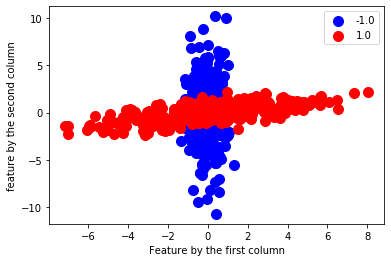

In [16]:
scatter_x = X[:, 0]
scatter_y = X[:, 1]

cdict = {1: 'red', -1: 'blue'}
fig, ax = plt.subplots()
for g in np.unique(y):
    ix = np.where(y == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.xlabel("Feature by the first column")
plt.ylabel("feature by the second column")
plt.show()

In [17]:
# compute mean vector for each column 
mean_vec_col= X.mean(axis=0)
print(mean_vec_col)

[-0.01993225  0.01101921]


In [18]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
Cov_mat=cov_mat(X.T) # (or with np.cov(X.T))
Cov_mat

array([[4.29015165, 0.92392703],
       [0.92392703, 6.13396341]])

In [19]:
df = pd.DataFrame(Z)
df_1 = pd.DataFrame(Z, columns = ['first', 'second', 'label'])

In [20]:
# select rows with the condition for label (y==1)
pos_num = df_1.loc[df_1['label'] ==1] 

In [21]:
# select rows with the condition for label (y== -1)
neg_num = df_1.loc[df_1['label'] ==-1] 

In [33]:
# compute the mean vector of pos_num (extracted rows from the given dataset with the condition of label(y==1))
pos_num_select = pos_num[['first','second']]
np_pos = pos_num_select.to_numpy()
# compute the mean vectors for the extracted rows with the label (y==+1)
mu_pos = np_pos.mean(axis=0)
print(mu_pos)

[-0.01520551 -0.01206552]


In [34]:
# compute the mean vector of ne_num (extracted rows from the given dataset with the condition of label(y==-1))
neg_num_select = neg_num[['first','second']]
np_neg = neg_num_select.to_numpy()
# compute the mean vectors for the extracted rows with the label (y==-1)
mu_neg = np_neg.mean(axis=0)
print(mu_neg)

[-0.02465899  0.03410394]


In [35]:
# compute the covariance of the pos_num 

cov_mat_pos=cov_mat(np_pos.T)
cov_mat_pos

array([[8.35331773, 1.88490458],
       [1.88490458, 0.90961867]])

In [36]:
# compute the covariance of the neg_num 

cov_mat_neg=cov_mat(np_neg.T)
cov_mat_neg

array([[ 0.24128906, -0.0337415 ],
       [-0.0337415 , 11.37775369]])

In [4]:
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return np.sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries

In [5]:
def calculate_probability(x, mean, stdev):
    exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent
 

In [6]:
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities

In [7]:
summaries = summarize_by_class(Z)
probabilities = calculate_class_probabilities(summaries, Z[0])  # for testing the probability of the row 
print(probabilities)

{1.0: 0.00295384534140166, -1.0: 1.1472094613671372e-18}


In [62]:
prob = list(probabilities.values())
probability_pos = prob[0]
probability_neg = prob[1]

<h2 style="color:rgb(0,120,170)">Task 2: Gaussian classifier: compute classifier & visualization</h2>

* Compute an optimal classification function $g$ (see slide 17 from lectures Unit 2) by calculating the values of the corresponding parameters $\mathbf{A}$, $\mathbf{b}$ and $c$. Print the solutions. 
* Visualize the classification function and the decision boundaries in a two-dimensional plot.


<h3 style="color:rgb(210,90,80)">Code (20 points):</h3>

In [ ]:
boundary_func(first_feature,y, cov_mat_pos,cov_mat_neg, mu_pos, mu_neg, probability_pos,probability_neg))

In [92]:
def boundary_func(x, y, cov_mat_pos, cov_mat_neg, mu_vec_pos, mu_vec_neg, probability_pos,probability_neg):
    
    x_vec = np.array([[x],[y]])
 
    W_positive = np.linalg.inv(cov_mat_pos)
    assert(W_positive.shape[0] > 1 and W_positive.shape[1] > 1), 'W_i must be a matrix'

    W_negative = np.linalg.inv(cov_mat_neg)
    assert(W_negative.shape[0] > 1 and W_negative.shape[1] > 1), 'W_i must be a matrix'
    
    omega_i_p1_positive = (((-1/2) * (mu_vec_pos).T).dot(np.linalg.inv(cov_mat_pos))).dot(mu_vec_pos)
    omega_i_p2_positive = (-1/2) * np.log(np.linalg.det(cov_mat_pos))
    omega_i_p1_negative = (((-1/2) * (mu_vec_neg).T).dot(np.linalg.inv(cov_mat_neg))).dot(mu_vec_neg)
    omega_i_p2_negative = (-1/2) * np.log(np.linalg.det(cov_mat_neg))

    
    A = W_positive - W_negative
    
    b = (((mu_vec_pos.T)).dot(np.linalg.inv(cov_mat_pos))) - (((mu_vec_neg.T)).dot(np.linalg.inv(cov_mat_neg)))

    c = omega_i_p1_positive + omega_i_p1_negative  + omega_i_p2_positive + omega_i_p2_negative + np.log(probability_pos) + np.log(probability_neg)

    g = (-1/2)*(((x_vec).dot(A)).dot(x_vec.T)) + (b).dot(x_vec.T) + c
    
    return float(g)

In [ ]:
boundary_func(first_feature,y, cov_mat_pos,cov_mat_neg, mu_pos, mu_neg, probability_pos,probability_neg))

In [78]:
 x_vec = np.vstack((x,y))
    
    W_positive = np.linalg.inv(cov_mat_pos)
    assert(W_positive.shape[0] > 1 and W_positive.shape[1] > 1), 'W_i must be a matrix'

    W_negative = np.linalg.inv(cov_mat_neg)
    assert(W_negative.shape[0] > 1 and W_negative.shape[1] > 1), 'W_i must be a matrix'
    
    omega_i_p1_positive = (((-1/2) * (mu_vec_pos).T).dot(np.linalg.inv(cov_mat_pos))).dot(mu_vec_pos)
    omega_i_p2_positive = (-1/2) * np.log(np.linalg.det(cov_mat_pos))
    omega_i_p1_negative = (((-1/2) * (mu_vec_neg).T).dot(np.linalg.inv(cov_mat_neg))).dot(mu_vec_neg)
    omega_i_p2_negative = (-1/2) * np.log(np.linalg.det(cov_mat_neg))

    
    A = W_positive - W_negative
    
    b = (((mu_vec_pos.T)).dot(np.linalg.inv(cov_mat_pos))) - (((mu_vec_neg.T)).dot(np.linalg.inv(cov_mat_neg)))

    c = omega_i_p1_positive + omega_i_p1_negative  + omega_i_p2_positive + omega_i_p2_negative + np.log(probability_pos) + np.log(probability_neg)

    g = (-1/2)*(((x_vec).dot(A)).dot(x_vec.T)) + (b).dot(x_vec.T) + c

1.1472094613671372e-18

In [83]:
fnc = boundary_func(first_feature,y, cov_mat_pos,cov_mat_neg, mu_pos, mu_neg, probability_pos,probability_neg)

ValueError: shapes (2,600) and (2,2) not aligned: 600 (dim 1) != 2 (dim 0)

In [45]:
prob[1]

1.1472094613671372e-18

<h2 style="color:rgb(0,120,170)">Task 3: Level curves of Gaussian density </h2>

In the lecture we mentioned that the level curves of the density for a multivariate Gauss distribution are ellipses. Prove this fact for dimensions $d=2$ for two independent Gaussians with means $\mu_1$, $\mu_2$ and variances $\sigma_1^2$, $\sigma_2^2$. Hints: 
* The joint density is given as $p(x_1,x_2)=\frac{1}{2\pi\, \sigma_1 \sigma_2}\,\exp\left(-\frac{(x_1-\mu_1)^2}{2\sigma_1^2}-\frac{(x_2-\mu_2)^2}{2\sigma_2^2}\right)$
* For each $c \geq 0$ the collection of $(x_1,x_2)$ that solve $p(x_1,x_2)=c$ is called the level set of $p$ for the level $c$.
* An ellipsis in $d=2$ with center $(m_1,m_2)$ is given by the equation $\frac{(x_1-m_1)^2}{a^2}+\frac{(x_2-m_2)^2}{b^2}=1$ for some $a,b \in \mathbb{R}$. Try to bring $p(x_1,x_2)=c$ into this form.

For your calculation use the same notation as in the hints above.

Since it considers that n=2 and the covariance matrix $\sum_{}^{}$ ia diagona. 
then, we have

$$ x = \begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix}$$  $$ \mu = \begin{bmatrix} \mu_{1} \\ \mu_{2} \end{bmatrix}$$  
$$ \sum_{}^{} = \begin{bmatrix} \sigma^2_{1} & 0 \\ \sigma^2_{2} & 0 \end{bmatrix}$$ 

And then as we know that the joint density is as below:

$p(x_1,x_2)=\frac{1}{2\pi\, \sigma_1 \sigma_2}\,\exp\left(-\frac{(x_1-\mu_1)^2}{2\sigma_1^2}-\frac{(x_2-\mu_2)^2}{2\sigma_2^2}\right)$


Now we consider the level set consisting of all points where $p(x_1,x_2)=c$ for some constant where c in real number set. And consider the set of all $$x_{1},x_{2} \in R$$ such that

$$ c = \frac{1}{2\pi\, \sigma_1 \sigma_2}\,\exp\left(-\frac{(x_1-\mu_1)^2}{2\sigma_1^2}-\frac{(x_2-\mu_2)^2}{2\sigma_2^2}\right)$$

$$ {2\pi\,c\sigma_1 \sigma_2} = \exp\left(-\frac{(x_1-\mu_1)^2}{2\sigma_1^2}-\frac{(x_2-\mu_2)^2}{2\sigma_2^2}\right)$$

$$ \log({2\pi\,c \sigma_1 \sigma_2}) = -\frac{(x_1-\mu_1)^2}{2\sigma_1^2}+ \frac{(x_2-\mu_2)^2}{2\sigma_2^2}$$


$$log\left( \frac{1}{2\pi\,c \sigma_1 \sigma_2} \right) = \frac{(x_1-\mu_1)^2}{2\sigma_1^2}+\frac{(x_2-\mu_2)^2}{2\sigma_2^2}$$

$$ 1 = \frac{(x_1-\mu_1)^2}{2\sigma_1^2\log\left( \frac{1}{2\pi\,c \sigma_1 \sigma_2} \right)}+\frac{(x_2-\mu_2)^2}{2\sigma_2^2\log\left( \frac{1}{2\pi\,c \sigma_1 \sigma_2} \right)}$$

So, let's replace $$r_{i}= \sqrt{{2\sigma_i^2\log\left( \frac{1}{2\pi\,c \sigma_i \sigma_i} \right)}}$$

Therefore, the given eqaution can be written as 

$$1= \left( \frac{x_1-\mu_1}{r_1}^2 \right) + \left( \frac{x_2-\mu_2}{r_2}^2 \right)$$

This equation is an axis-aligned ellipse where its center $(\mu_1,\mu_2)$

<h3 style="color:rgb(210,90,80)">Calculation (10 points):</h3>

<h2 style="color:rgb(0,120,170)">Task 4: Details for bias-variance decomposition for quadratic loss </h2>

Also an explicit formula of the bias variance decomposition for the quadratic loss was mentioned in the lecture. In this task, you will be asked to fill in some details that haven't been discussed there. To this end, let us introduce some notation:

$Z_l$ denotes a data matrix of $l$ elements from our data set $Z =(X,\mathbf{y})$ with $X$ the feature matrix and $\mathbf{y}$ the label vector. $g(\mathbf{x}_0;\mathbf{w}(Z_l)))$ denotes the model, with a parameter vector $\mathbf{w}(Z_l)$ originating from $Z_l$, and $y$ is the label corresponding to a feature vector $\mathbf{x}_0$. 

Our object of interest is the expected prediction error (EPE) for
$\mathbf{x}_0\in X$ in case of the quadratic loss, i.e.:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big(L_{\mathbf{q}}(y,g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)
= \mathrm{E}_{y\mid
\mathbf{x}_0,Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)$$

We assume that $y\mid\mathbf{x}_0$ and the selection of training samples $Z_l$ are
independent which results in the following reformulation of the total expected prediction error:

$$\mathrm{EPE}(\mathbf{x}_0) = \mathrm{E}_{y\mid
\mathbf{x}_0}\Big(\mathrm{E}_{Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)))^2\big)\Big)$$

Show that we can obtain the following bias-variance decomposition:

\begin{align*}
\mathrm{EPE}(\mathbf{x}_0)=&\,\operatorname{Var}(y\mid\mathbf{x}_0)\\
&+\Big(\mathrm{E}_{y\mid\mathbf{x}_0}(y)-E_{Z_l}\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))\big)\Big)^2\\
&+\mathrm{E}_{Z_l}\Big(\big(g(\mathbf{x}_0;\mathbf{w}(Z_l))-E_{Z_l}(g(\mathbf{x}_0;\mathbf{w}(Z_l)))\big)^2\Big)
\end{align*}
Hints: 
* Expand the square in the quardratic loss and the expressions from the three parts of the decompositon you want to obtain.
* Find a way to match those expressions.
* It might be useful to recall that $\mathrm{E}(\mathrm{E}(v))=\mathrm{E}(v)$ for any random variable $v$.

For your calculation please use the given notation.

As the quadratic loss function is $$ \mathrm{E}_{Z_l}\big((y-g(\mathbf{x}_0;\mathbf{w}(Z_l)^2)\big)$$

and this equation can be written as the below because $\epsilon$ and $(g(\mathbf{};\mathbf{w}(Z_l)))$ are independent

$$\mathrm{E}_{Z_l}\big((y-\epsilon-g(\mathbf{x}_0;\mathbf{w}(Z_l)^2)\big)$$ where $ y= f+\epsilon$ and 

$$ \mathrm{E}_{Z_l}\big(y-g(\mathbf{};\mathbf{w}(Z_l))^2) = \mathrm{E}_{Z_l}\big(f+\epsilon - g(\mathbf{};\mathbf{w}(Z_l)^2)$$

$$ \mathrm{E}_{Z_l}\big(y-g(\mathbf{};\mathbf{w}(Z_l))^2) = \mathrm{E}_{Z_l}\big(f +\epsilon - g(\mathbf{};\mathbf{w}(Z_l)) + \mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l)) - \mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))^2) $$


$$ \mathrm{E}_{Z_l}\big(y-g(\mathbf{};\mathbf{w}(Z_l))^2) = \mathrm{E}_{Z_l}\Big(\big(f- \mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l)))^2\Big) + \mathrm{E}_{Z_l}\big(\epsilon^2\big) + \mathrm{E}_{Z_l}\Big(\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big)-g(\mathbf{};\mathbf{w}(Z_l)))^2\Big) +2\mathrm{E}_{Z_l}\Big(f-\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big)\epsilon\Big) + 2\mathrm{E}_{Z_l}\Big(\epsilon\big(\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big)-g(\mathbf{};\mathbf{w}(Z_l))\big)\Big) +2\mathrm{E}_{Z_l}\Big(\big(\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big)-g(\mathbf{};\mathbf{w}(Z_l))\big)\big(f -\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big) $$


then, 

$$ \mathrm{E}_{Z_l}\big(y-g(\mathbf{};\mathbf{w}(Z_l))^2) = \Big(f - \mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big)\Big)^2 + \mathrm{E}_{Z_l}\big(\epsilon^2) + \mathrm{E}_{Z_l}\Big(\big(\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big) - g(\mathbf{};\mathbf{w}(Z_l))\big)^2\Big) +2\big(f - \mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big)\mathrm{E}_{Z_l}\big(\epsion\big) +2\mathrm{E}_{Z_l}\big(\epsilon\big)\mathrm{E}_{Z_l}\Big(\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big) - g(\mathbf{};\mathbf{w}(Z_l))\Big) +2\mathrm{E}_{Z_l}\Big(\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big)-g(\mathbf{};\mathbf{w}(Z_l))\Big)\big(f -\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big)\Big) $$


$$ \mathrm{E}_{Z_l}\big(y-g(\mathbf{};\mathbf{w}(Z_l))^2) = \big(f -\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big)\Big)^2 + \mathrm{E}_{Z_l}\big(\epsilon^2\big)+\mathrm{E}_{Z_l}\Big(\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l)) - g(\mathbf{};\mathbf{w}(Z_l))\big)^2\Big) $$


$$ \mathrm{E}_{Z_l}\big(y-g(\mathbf{};\mathbf{w}(Z_l))^2) = \Big(f-\mathrm{E}_{Z_l}\big(g(\mathbf{};\mathbf{w}(Z_l))\big)\Big)^2 +Var\big(y) +Var\Big(g(\mathbf{};\mathbf{w}(Z_l))) $$ 

$$ \mathrm{E}_{Z_l}\big(y-g(\mathbf{};\mathbf{w}(Z_l))^2) = Bias\big( g(\mathbf{};\mathbf{w}(Z_l))\big)^2 +Var\big(y\big) +Var\big(g(\mathbf{};\mathbf{w}(Z_l))\big)$$



<h3 style="color:rgb(210,90,80)">Calculation (15 points):</h3>

<h2 style="color:rgb(0,120,170)">Task 5: Bias-variance decomposition for regression </h2>

<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

Consider the following one-dimensional regression task: inputs $x$ are
uniformly distributed in $[−1, 3] \subset \mathbb{R}$ and targets $y$ are given as

\begin{align*}
f(x) &= 0.6\,x^4 + 2\,x^3 - 8\,x^2 \\
y &= f(x) + \varepsilon,
\end{align*}

where $\varepsilon$ is independent normally distributied noise with $\mu=0$ and $\sigma^2 = 0.09$. 

* What are $E(y \mid x_0)$ and the unavoidable error $\operatorname{Var}(y \mid x_0)$ for a fixed $x_0$ in this setting?

Tick the correct box:

\[ V \]  $E(y \mid x_0) = 0.6x_0^4 + 2x_0^3 - 8x_0^2 \text{ and }\operatorname{Var}(y \mid x_0) = \sigma^2$. <br>
\[  \]   $E(y \mid x_0) = 0.6\sigma^4 + 2\sigma^3 - 8\sigma^2 \text{    and    } \operatorname{Var}(y \mid x_0) = x_0^2$. <br>
\[  \]   $E(y \mid x_0) = 0 \text{ and }  \operatorname{Var}(y \mid x_0) = \sigma^2$. <br>
\[  \]   $E(y \mid x_0) = 0.6x_0^4 + 2x_0^3 - 8x_0^2 \text{    and    } \operatorname{Var}(y \mid x_0) = 0.6x_0^4 + 2x_0^3 - 8x_0^2+\sigma^2$.<br>


We intend to perform polynomial regression to illustrate the bias-variance decomposition for the regression task described before. To this end, perform the following steps.
 * Create $k=200$ training sets with $l=20$ samples each.
 * Below, we provide the code for a function that trains a polynomial regression model with degree $m$ on a given training set and returns the prediction for a given test set.
 Use this function to produce <em>one</em> plot that simultaneously visualizes the training data as dots (plot only the <em>first</em> instance of each of the $l$ training sets) and the corresponding models for $m=1,4,11$. Don't forget to label the axes.
 3. For each degree $m=1,...,11$ estimate the squared bias and the variance from the predictions for each of the $k=200$ training sets at $x_0=1.8$ and store them in the lists sqbias and variance (which are already initiated as empty lists). Each of the lists should then only contain $11$ elements. Print these lists. Finally visualize your results in <em>one</em> plot where the dependence of the variance and squared bias versus $m$ is shown. Again, the axes should be labeled apporopriately.

<h3 style="color:rgb(210,90,80)">Code (30 points):</h3>

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#some code that should help you

np.random.seed(14)
x0 = np.array([1.8])
sqbias = []
variance = []

def pol_reg_pred(X_train,y_train,X_test,m):
    poly_reg = PolynomialFeatures(m)
    X_poly_train = poly_reg.fit_transform(X_train.reshape(-1, 1))
    X_poly_test= poly_reg.fit_transform(X_test.reshape(-1, 1))
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y_train)
    y_pred = lin_reg.predict(X_poly_test)
    return y_pred

# your code here:

In [197]:
num_dataset =200
samples =20
mu =0.0
sigma = np.sqrt(0.09)

uniform_data = np.random.uniform(-1,3,(samples,num_dataset))

In [219]:
uniform_data.shape

(20, 200)

In [220]:
def function (x,mu,sigma):
    
    expect = 0.6*x**4+2*x**3-8*x**2
    true_value = expect + np.random.normal(mu, sigma)
    
    return true_value

In [222]:
result = np.zeros((20, 200))

for i in range (num_dataset):
    
    for j in range (samples):
        
        input = np.random.uniform(-1,3)
        outcome = function(input, mu, sigma)
        result[j,i] = outcome 
        
        

In [223]:
result.shape

(20, 200)

In [347]:
def run_fnc (degree):
    
    predicted_list = np.zeros((1,200))

    for col in range (0,200):
    
        if col == 0:
            x_train = uniform_data[:,col]
            y_train = result[:,col]
            x_test  = uniform_data[:,-1]
            predict_value = pol_reg_pred(x_train,y_train,x_test,degree)
            predicted_list[:,-1] = predict_value
        
        else:
            x_train = uniform_data[:,col]
            y_train = result[:,col]
            x_test  = uniform_data[:,col-1]
            predict_value = pol_reg_pred(x_train,y_train,x_test,degree)
            predicted_list[:,col-1] = predict_value
            
    return predicted_list

In [348]:
predicted_list_1 = run_fnc(1)
predicted_list_4 = run_fnc(4)
predicted_list_11= run_fnc(11)


In [392]:
predicted_list_1_first_row = list(range(0,200))
predicted_list_4_first_row = list(range(0,200))
predicted_list_11_first_row = list(range(0,200))
for i in range(0,200):
    
    predicted_list_1_first_row[i] = predicted_list_1[0][i]
    predicted_list_4_first_row[i] = predicted_list_4[0][i]
    predicted_list_11_first_row[i] =predicted_list_11[0][i]

In [430]:
df_1 = pd.DataFrame(np.array(predicted_list_1_first_row).reshape(200,1))
df_1.columns =['1']

In [431]:
df_2 = pd.DataFrame(np.array(predicted_list_4_first_row).reshape(200,1))
df_2.columns =['4']

In [432]:
df_3 = pd.DataFrame(np.array(predicted_list_11_first_row).reshape(200,1),)
df_3.columns =['11']

In [433]:
df_rows = pd.concat([df_1, df_2,df_3], axis=1)

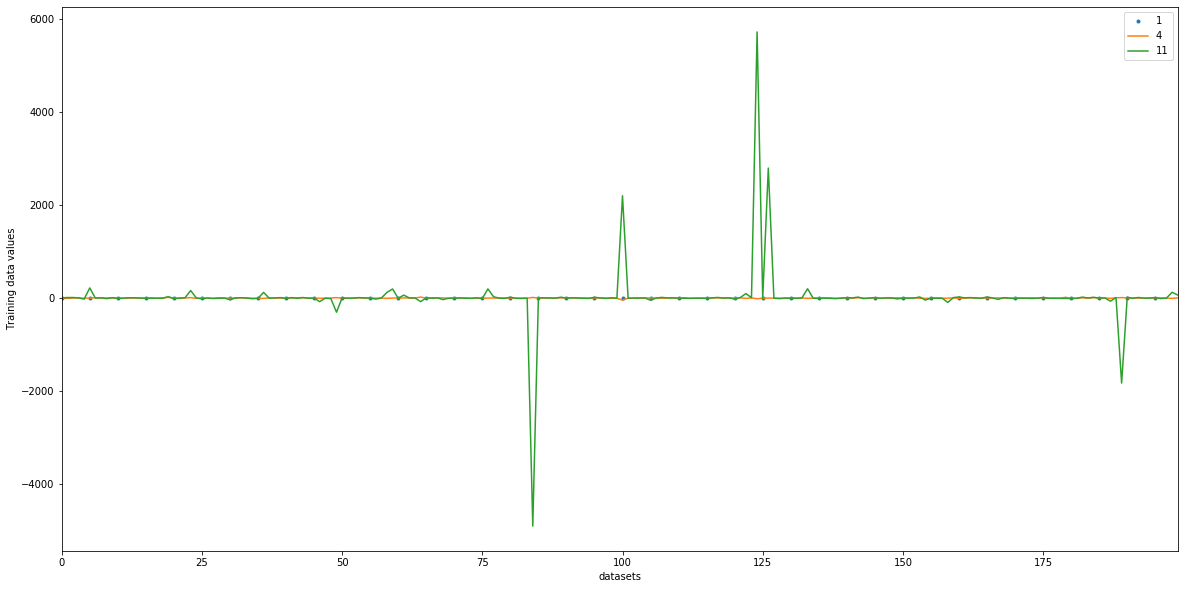

In [460]:
ax = df_rows['1'].plot(style=".", markevery=5, figsize=(20,10))
df_rows['4'].plot(ax=ax)
df_rows['11'].plot(ax=ax)
plt.xlabel('datasets')
plt.ylabel('Training data values')
plt.legend()
plt.show()

For each degree  𝑚=1,...,11  estimate the squared bias and the variance from the predictions for each of the  𝑘=200  training sets at  𝑥0=1.8  and store them in the lists sqbias and variance (which are already initiated as empty lists). Each of the lists should then only contain  11  elements. Print these lists. Finally visualize your results in one plot where the dependence of the variance and squared bias versus  𝑚  is shown. Again, the axes should be labeled apporopriately

In [463]:
fixed_in = 1.8

fixed_value = np.full((1, 200), 1.8)

for col in range (0,200)

In [ ]:
def run_fnc_1 (degree):
    
    predicted_list = np.zeros((1,200))

    for col in range (0,200):
    
        if col == 0:
            x_train = uniform_data[:,col]
            y_train = result[:,col]
            x_test  = uniform_data[:,-1]
            predict_value = pol_reg_pred(x_train,y_train,x_test,degree)
            predicted_list[:,-1] = predict_value
        
        else:
            x_train = uniform_data[:,col]
            y_train = result[:,col]
            x_test  = uniform_data[:,col-1]
            predict_value = pol_reg_pred(x_train,y_train,x_test,degree)
            predicted_list[:,col-1] = predict_value
            
    return predicted_list

In [475]:
result_fixed = np.zeros((1, 200))

for i in range (200):
        
        input = 1.8
        outcome_1 = function(input, mu, sigma)
        result_fixed[0][i] = outcome_1 
        


In [472]:
result_fixed = np.zeros((1, 200))


In [477]:
result_fixed.shape

(1, 200)

<h3 style="color:rgb(210,90,80)">Question (10 points):</h3>

If you did the previous task correctly, the resulting plot should look like this:
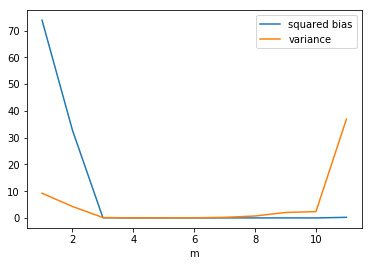    


What observations can you make from this plot? Tick the correct boxes (several may be correct):


\[  \]   For appropriate complexity, i.e. $3 \leq m < 7$, both model variance and bias are low, which indicates good generalization abilities. <br>
\[  \] The variance is low for models which are too simple, i.e. $m<3$.<br>
\[  \]   As the model becomes too complex, i.e. $m \geq 7$, the variance increases again while the bias still decreases. This is an indication for underfitting.<br>
<br>
The model varies drastically in one point when trained on different data sets drawn from the same distribution.<br>
\[  \] For these models, the bias is still low because the independent noise has zero mean and high individual biases cancel in expectation. <br>
\[  \]  For these models, the variance is high because the independent noise has zero mean and high individual biases cancel in expectation. <br>